# 1 Introduccion

En fotografía se le llama negativo a una imagen en una tira u hoja de película transparente en la que las áreas más claras de lo fotografiado aparecen más oscuras y las áreas mas oscuran aparecen más claras. . Este orden inverso se produce porque los productos químicos extremadamente sensibles a la luz que debe utilizar una película de cámara para capturar una imagen con la suficiente rapidez para la toma de fotografías normal se oscurecen, en lugar de decolorarse, por la exposición a la luz y el procesamiento fotográfico posterior.

Tambien estan los casos de los negativos en color donde los colores se invierten en sus respectivos colores complementarios.

Los negativos se utilizan normalmente para hacer impresiones positivas en papel fotográfico proyectando el negativo sobre el papel con una ampliadora fotográfica o haciendo una impresión por contacto . El papel también se oscurece en proporción a su exposición a la luz, por lo que se produce una segunda inversión que devuelve la luz y la oscuridad a su orden normal.

El siguiente ejercicio modifica una imagen, pasandola a modo negativo y para ellos buscamos sus colores complementarios. Para esto se realiza un cálculo sobre los tres canales RGB (Rojo, Verde y Azul), de cada pixel de la imagen.Dicho calculo consiste en restarle al maximo valor que puede alcanzar un componenten del color (255), el valor de cada componente del color actual. Este cálculo se hace por cada componente del color.

Por ejemplo para hallar el color complementario de el color cuyo valor RGB es rgb(250,100,177) haremos los siguientes cálculos.

R - Red = 255 - 250 = 5
G - Green = 255 - 100 = 155
B - Blue = 255 - 177 = 78

Resultando el nuevo color complementario un color con valor rgb(5,155,78).

Este nuevo valor sera el que guardaremos y formara parte de la nueva imagen.









# 2 Armado del ambiente



Tomamos la imagen con acceso publico y la dejamos dispobible en el contexto de ejecución de colab.

In [1]:
#@title # 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true" #@param {type:"string"}

#@markdown ---
# Leo la imagen desde internet.
#!wget https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true -O imagen.jpg

# TODO: Mejorar informaciòn y resutlado de ejecución. 
!wget {url_imagen} -O imagen.jpg

--2020-11-22 21:14:04--  https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/wvaliente/SOA_HPC/raw/main/unlam.jpg [following]
--2020-11-22 21:14:04--  https://github.com/wvaliente/SOA_HPC/raw/main/unlam.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wvaliente/SOA_HPC/main/unlam.jpg [following]
--2020-11-22 21:14:05--  https://raw.githubusercontent.com/wvaliente/SOA_HPC/main/unlam.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147032 (144K) [image/jpeg]


Para GPU



In [4]:
!pip install pycuda

     |████████████████████████████████| 1.6MB 16.9MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 81kB 13.0MB/s 
  Created wheel for pycuda: filename=pycuda-2020.1-cp36-cp36m-linux_x86_64.whl size=621008 sha256=4a5b0189ff21ef4af01dea4b4cd27f7be6e39cd0ea3601313a25ae95ea9cc7f1
  Stored in directory: /root/.cache/pip/wheels/8f/78/d1/5bb826f81d9d490297a348d818ff3ee6dd6f2075b06dde6ea0
  Created wheel for pytools: filename=pytools-2020.4.3-py2.py3-none-any.whl size=61374 sha256=560cd47b9cd7dbd19d9faa5fefbac3737839a4241f46321e2a722ab6f622835b
  Stored in directory: /root/.cache/pip/wheels/af/c7/81/a22edb90b0b09a880468b2253bb1df8e9f503337ee15432c64
Successfully built pycuda pytools


# 3 Desarrollo

Ejecucion para CPU

Imagen del filtro: imagen.jpg -RGB- [768, 1024]
Tiempo de conversión de imagen: 6591.6630000000005 [ms]
Tiempo Total: 6674.969 [ms]


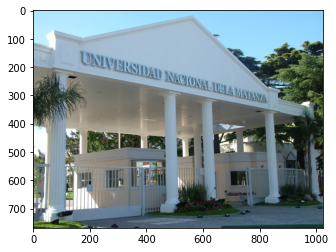

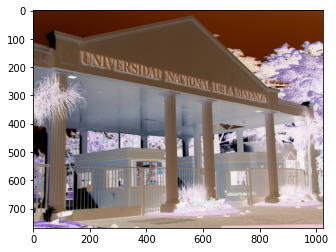

In [2]:
from datetime import datetime

tiempo_total = datetime.now()

import  matplotlib.pyplot as plt
import numpy
from PIL import Image 

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------


img_nombre = 'imagen.jpg'
image = Image.open( img_nombre ) 
  
# Optengo las proporciones de la imagen. 
img_alto, img_ancho = image.size 

# Convierto la imagen comprimida a array.
img_pic_cpu = numpy.asarray(image)

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
img_picR_cpu = numpy.empty_like( img_pic_cpu)

# Mostramos los atributos de la imagen
print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  


# Mostramos la imagen original
plt.figure()
imgplot=plt.imshow( img_pic_cpu )

tiempo_img = datetime.now()

# Convierto la imagen a negativo.
for y  in range( 0, img_alto ):
  for x in range( 0, img_ancho ):
    pixel_R, pixel_G, pixel_B = img_pic_cpu[x][y]
    pixel_complemento_R = 255 - pixel_R
    pixel_complemento_G = 255 - pixel_G
    pixel_complemento_B = 255 -  pixel_B
    img_picR_cpu[x][y] = [pixel_complemento_R, pixel_complemento_G, pixel_complemento_B]

tiempo_img = datetime.now() - tiempo_img

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot = plt.imshow( img_picR_cpu )

tiempo_total = datetime.now() - tiempo_total

print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )

Ejecución para GPU

Imagen del filtro: imagen.jpg -RGB- [768, 1024]
Thread: [ 16 , 16  ], Bloque : [ 48 , 64 ]
Total de Thread: [ 768 , 1024  ]  =  786432
Tiempo TOTAL:  884.786 [ms]
Tiempo GPU  :  1.31 [ms]


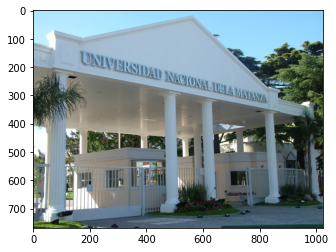

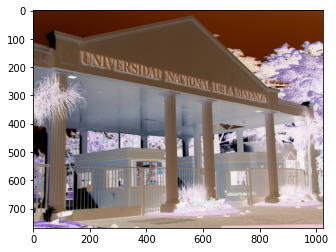

In [2]:
%matplotlib inline
from datetime import datetime
tiempo_total = datetime.now()

import matplotlib.pyplot as plt
import numpy
from PIL import Image 
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

img_nombre = 'imagen.jpg'
image = Image.open( img_nombre ) 
  
# summarize some details about the image 
img_alto, img_ancho = image.size 

# Convierto la imagen comprimida en JPEG/PNG a array
img_O_cpu = numpy.asarray(image)
img_R_cpu = numpy.empty_like( img_O_cpu)

# Reservo los 2 vectores en GPU(3 pixeles usa RGB * (el tamaño del array))
img_O_gpu = cuda.mem_alloc( img_O_cpu.nbytes )
img_R_gpu = cuda.mem_alloc( img_R_cpu.nbytes )

# GPU - Copio la memoria al GPU.
cuda.memcpy_htod( img_O_gpu, img_O_cpu )
cuda.memcpy_htod( img_R_gpu, img_R_cpu )

# CPU - Defino la función kernel que ejecutará en GPU.
module = SourceModule("""
__global__ void kernel_img( int ancho, int alto, char *img_O, char *img_R )
{
  // Calculo las coordenadas del Thread en dos dimensiones.
  int idx = threadIdx.x + blockIdx.x*blockDim.x;
  int idy = threadIdx.y + blockIdx.y*blockDim.y;
  int complementario1 = 0.0;
  int complementario2 = 0.0;
  int complementario3 = 0.0; 
 
 

  // Verifico que los Thread, esten dentro de las dimensiones de la imagen.
  if( idx < ancho && idy < alto )
  {
    // Calculo complementario para el pixel a partir de los componentes.
    complementario1 = (int)255-img_O[(idx+(idy*ancho))*3    ];       // Componente Rojo del pixel.
    complementario2 =(int)255-img_O[((idx+(idy*ancho))*3)+1];       // Componente Verde del pixel.
    complementario3 =(int)255-img_O[((idx+(idy*ancho))*3)+2];  // Componente Azul del pixel.
  
    // Escribo el color del pixel.
    img_R[(idx+(idy*ancho))*3  ] = (int) complementario1;
    img_R[(idx+(idy*ancho))*3+1] = (int) complementario2;
    img_R[(idx+(idy*ancho))*3+2] = (int) complementario3;
  }
}
""") 

# Muestro los atributos de la imagen y como se ve antes del seudo filtro.
print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

# CPU - Genero la función kernel.
kernel = module.get_function("kernel_img")

tiempo_img = datetime.now()

dim_hilo_x = 16
dim_bloque_x = numpy.int( (img_ancho+dim_hilo_x-1) / dim_hilo_x )

dim_hilo_y = 16
dim_bloque_y = numpy.int( (img_alto+dim_hilo_y-1) / dim_hilo_y )

print( "Thread: [", dim_hilo_x, ",", dim_hilo_y, " ], Bloque : [", dim_bloque_x, ",", dim_bloque_y, "]" )
print( "Total de Thread: [", dim_hilo_x*dim_bloque_x, ",", dim_hilo_y*dim_bloque_y, " ]", " = ", dim_hilo_x*dim_bloque_x*dim_hilo_y*dim_bloque_y )

tiempo_img = datetime.now()

kernel( numpy.int32(img_ancho), numpy.int32(img_alto), img_O_gpu, img_R_gpu, block=( dim_hilo_x, dim_hilo_y, 1 ), grid=(dim_bloque_x, dim_bloque_y,1) )

tiempo_img = datetime.now() - tiempo_img

# GPU - Copio el resultado desde la memoria GPU.
cuda.memcpy_dtoh( img_R_cpu, img_R_gpu )

# Muestro la imagen Original el filtro.
plt.figure()
imgplot=plt.imshow( img_O_cpu )

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot=plt.imshow( img_R_cpu )

tiempo_total = datetime.now() - tiempo_total

print("Tiempo TOTAL: ", tiempo_en_ms( tiempo_total ), "[ms]" )
print("Tiempo GPU  : ", tiempo_en_ms( tiempo_img ), "[ms]" )

# 4 Tabla de pasos

# 4.1 Para CPU
Procesador | Función | Detalle
---------- | -------   | -------
CPU        | @param   | Lectura de dirección URL de imagen a procesar
CPU        | import | Importa todos los modulos necesarios para el funcionamiento
CPU        | datetime.now() |Toma el tiempo actual.
CPU        | 	Image.open() | 	Abre la imagen
CPU        | numpy.asarray(imagen) |Convierte la imagen en jpg a array
CPU        | numpy.empty_like()      |Genero un nuevo array el cual tendra la imagen modificada
CPU        | print()       | Se informa los atributos de la imagen original
CPU        | plt.imshow       | Se muestra la imagen original.
CPU        | for...for..      | Convierte la imagen en una imagen en negativo.
CPU        | plt.imshow       | Muestra la nueva imagen que se obtuvo como resultado de convertirla a negativo.

# 4.2 Para GPU
Procesador | Función | Detalle
---------- | -------   | -------
CPU        | wget url_imagen   | Lectura de dirección URL de imagen a procesar
CPU        | pip install pycuda | Instala los drivers de CUDA
CPU        | matplotlib inline | Macro de Colab para mostrar imagenes.
CPU        | import | Importa todos los modulos necesarios para el funcionamiento
CPU        | datetime.now() |	Toma el tiempo inicial.
CPU        | 	Image.open() | 	Abre la imagen
CPU        | numpy.asarray(imagen) |Convierte la imagen en jpg a array
CPU        | numpy.empty_like()      |Genero un nuevo array el cual tendra la imagen modificada
GPU        | cuda.mem_alloc() | Reserva la memoria en GPU
GPU        | cuda.memcpy_htod() | Copia las memorias desde el CPU al GPU.
CPU        | SourceModule() |	Define el código del kernel
CPU        | module.get_function() | Genera la función del kernel GPU
CPU        | dim_tx/dim_bx | Calcula las dimensiones
GPU        | kernel() | Ejecuta el kernel en GPU
CPU        | print() | Informo los atributos de la imagen
CPU        | cuda.memcpy_dtoh( ) | Copia desde la memoria GPU al CPU.
CPU        | plt.imshow       | Se muestra la imagen original.
CPU        | plt.imshow       | Muestra la nueva imagen que se obtuvo como resultado de convertirla a negativo.

# 5 Conclusiones

Podemos ver como para un mismo problema, dos soluciones implementadas de manera diferentes nos da distintos resultados en lo que respecto al tiempo de ejecución. Si bien, tanto en la implementacion en CPU y GPU la conversión de la imagen a negativo funciona correctamente, se ve una difenrencia en los tiempos de ejecución muy a favor de la implementación con cuda.

Tiempo total de ejecución en cpu: 6674.969 [ms]

Tiempo total de ejecucin con cuda: 884.786 [ms]

# 6 Bibliografía

[1] Negative (photography): [Referencia]( https://es.qaz.wiki/wiki/Negative_(photography))

[2] GPU Accelerated Computing with Python: [Referencia](https://developer.nvidia.com/how-to-cuda-python)

[3] PyCUDA Documentation: [Referencia](https://documen.tician.de/pycuda/)